# 线性模型和梯度下降
## 一元线性回归
一元线性模型非常简单，假设我们有变量 $x_i$ 和目标 $y_i$，每个 i 对应于一个数据点，希望建立一个模型

$$
\hat{y}_i = w x_i + b
$$
$\hat{y}_i$ 是我们预测的结果，希望通过 $\hat{y}_i$ 来拟合目标 $y_i$，通俗来讲就是找到这个函数拟合 $y_i$ 使得误差最小，即最小化

$$
\frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2
$$

## 梯度下降法
更新公式就是

$$
w := w - \eta \frac{\partial f(w,\ b)}{\partial w} \\
b := b - \eta \frac{\partial f(w,\ b)}{\partial b}
$$
通过不断地迭代更新，最终我们能够找到一组最优的 w 和 b，这就是梯度下降法的原理。
例子如下

In [1]:
import torch 
import numpy as np
from torch.autograd import Variable
torch.manual_seed(2018) #为CPU设置种子用于生成随机数，以使得结果是确定的 

#if args.cuda: 
#torch.cuda.manual_seed(args.seed)#为当前GPU设置随机种子；如果使用多个GPU，应该使用
#torch.cuda.manual_seed_all()为所有的GPU设置种子。


In [2]:
# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

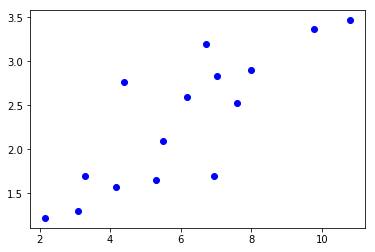

In [3]:
# 画出图像
import matplotlib.pyplot as plt
%matplotlib inline            
#  内嵌图画 有了%matplotlib inline 就可以省掉plt.show()
plt.plot(x_train, y_train, 'bo')

In [4]:
#转化为Tensor      numpy->Tensor->Variable
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
#定义参数w和b
w = Variable(torch.randn(1),requires_grad = True)#随机初始化
b = Variable(torch.zeros(1),requires_grad = True)#使用0初始化

In [5]:
#构建线性回归模型
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

In [6]:
#计算误差
def get_loss(y_, y):
    return torch.mean((y_ - y_train) ** 2)


w 和 b 的梯度分别是

$$
\frac{\partial}{\partial w} = \frac{2}{n} \sum_{i=1}^n x_i(w x_i + b - y_i) \\
\frac{\partial}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i)
$$

In [7]:
#loss自动求导
for e in range(10): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    loss.backward()
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    print('epoch: {}, loss: {}'.format(e, loss))

epoch: 0, loss: 45.315635681152344
epoch: 1, loss: 1.106460690498352
epoch: 2, loss: 0.28777116537094116
epoch: 3, loss: 0.27209916710853577
epoch: 4, loss: 0.2712911069393158
epoch: 5, loss: 0.27076074481010437
epoch: 6, loss: 0.2702382206916809
epoch: 7, loss: 0.2697184979915619
epoch: 8, loss: 0.2692013084888458
epoch: 9, loss: 0.26868686079978943


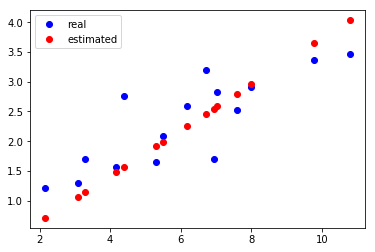

In [8]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

## 多项式回归
$$
\hat{y} = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \cdots
$$
首先我们可以先定义一个需要拟合的目标函数，这个函数是个三次的多项式

In [9]:
# 定义一个多变量函数

w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) # 打印出函数的式子

print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


In [10]:
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3
# 构建数据 x 和 y
# x 是一个如下矩阵 [x, x^2, x^3]
# y 是函数的结果 [y]
#x_train1 = np.array([x_sample ** i for i in range(1, 4)])#增加一个新的维度  维度为1
x_train2 = np.transpose([x_sample ** i for i in range(1, 4)])
x_train = np.stack([x_sample ** i for i in range(1, 4)], axis=1)
x_train = torch.from_numpy(x_train).float() # 转换成 float tensor
x_train2 = torch.from_numpy(x_train2).float() 
y_train = torch.from_numpy(np.transpose(y_sample)).float().unsqueeze(1) # 转化成 tensor ,unsqueeze增加一个维度

In [11]:
# 定义参数和模型
w = Variable(torch.randn(3, 1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

# 将 x 和 y 转换成 Variable
x_train2 = Variable(x_train2)
y_train = Variable(y_train) 

def multi_linear(x):
    return torch.mm(x, w) + b #两个tensor相乘

In [12]:
# 进行 100 次参数更新
for e in range(100):
    y_pred = multi_linear(x_train2)
    loss = get_loss(y_pred, y_train)
    loss.backward()
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    
    # 更新参数
    if (e + 1) % 20 == 0:
        print('epoch {}, Loss: {:.5f}'.format(e+1, loss.data[0]))

epoch 20, Loss: 79.58495
epoch 40, Loss: 18.62263
epoch 60, Loss: 4.40117
epoch 80, Loss: 1.08009
epoch 100, Loss: 0.30303


C:\Users\zhangwx\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


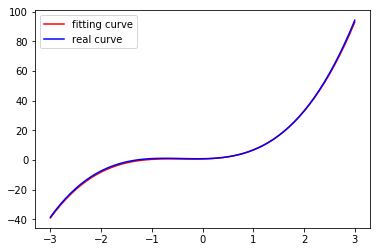

In [13]:
# 画出更新之后的结果
#y_pred = multi_linear(x_train2)

plt.plot(x_train2.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train2.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

小练习：上面的例子是一个三次的多项式，尝试使用二次的多项式去拟合它，看看最后能做到多好

提示：参数 w = torch.randn(2, 1)，同时重新构建 x 数据集

In [14]:
# 定义一个多变量函数

w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) # 打印出函数的式子

print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


In [15]:
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3
# 构建数据 x 和 y
# x 是一个如下矩阵 [x, x^2, x^3]
# y 是函数的结果 [y]
#x_train1 = np.array([x_sample ** i for i in range(1, 4)])#增加一个新的维度  维度为1
x_train2 = np.transpose([x_sample ** i for i in range(1, 3)])
x_train = np.stack([x_sample ** i for i in range(1, 3)], axis=1)
x_train = torch.from_numpy(x_train).float() # 转换成 float tensor
x_train2 = torch.from_numpy(x_train2).float() 
y_train = torch.from_numpy(np.transpose(y_sample)).float().unsqueeze(1) # 转化成 tensor ,unsqueeze增加一个维度

In [16]:
# 定义参数和模型
w = Variable(torch.randn(2, 1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

# 将 x 和 y 转换成 Variable
x_train2 = Variable(x_train2)
y_train = Variable(y_train) 

def multi_linear(x):
    return torch.mm(x, w) + b #两个tensor相乘

In [17]:
# 进行 100 次参数更新
for e in range(1000):
    y_pred = multi_linear(x_train2)
    loss = get_loss(y_pred, y_train)
    loss.backward()
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    
    # 更新参数
    if (e + 1) % 20 == 0:
        print('epoch {}, Loss: {:.5f}'.format(e+1, loss.data[0]))

C:\Users\zhangwx\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


epoch 20, Loss: 599.77051
epoch 40, Loss: 477.99689
epoch 60, Loss: 392.97171
epoch 80, Loss: 328.98944
epoch 100, Loss: 279.63892
epoch 120, Loss: 241.28319
epoch 140, Loss: 211.40395
epoch 160, Loss: 188.11162
epoch 180, Loss: 169.95039
epoch 200, Loss: 155.78886
epoch 220, Loss: 144.74597
epoch 240, Loss: 136.13467
epoch 260, Loss: 129.41956
epoch 280, Loss: 124.18292
epoch 300, Loss: 120.09917
epoch 320, Loss: 116.91448
epoch 340, Loss: 114.43079
epoch 360, Loss: 112.49370
epoch 380, Loss: 110.98289
epoch 400, Loss: 109.80445
epoch 420, Loss: 108.88526
epoch 440, Loss: 108.16815
epoch 460, Loss: 107.60866
epoch 480, Loss: 107.17209
epoch 500, Loss: 106.83141
epoch 520, Loss: 106.56542
epoch 540, Loss: 106.35776
epoch 560, Loss: 106.19553
epoch 580, Loss: 106.06879
epoch 600, Loss: 105.96971
epoch 620, Loss: 105.89226
epoch 640, Loss: 105.83155
epoch 660, Loss: 105.78406
epoch 680, Loss: 105.74676
epoch 700, Loss: 105.71746
epoch 720, Loss: 105.69444
epoch 740, Loss: 105.67626
epoch

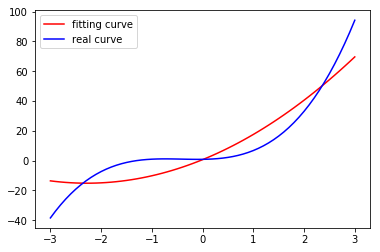

In [18]:
# 画出更新之后的结果
#y_pred = multi_linear(x_train2)

plt.plot(x_train2.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train2.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()